In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('wifi_localization.txt', header=None, sep='	')
data.columns = ['Connect_1', 'Connect_2', 'Connect_3', 'Connect_4' , 'Connect_5', 'Connect_6', 'Connect_7', 'Rooms']
data.info()
print(f"Количество дубликатов: {data.duplicated().sum()} ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Connect_1  2000 non-null   int64
 1   Connect_2  2000 non-null   int64
 2   Connect_3  2000 non-null   int64
 3   Connect_4  2000 non-null   int64
 4   Connect_5  2000 non-null   int64
 5   Connect_6  2000 non-null   int64
 6   Connect_7  2000 non-null   int64
 7   Rooms      2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
Количество дубликатов: 0 


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

feature = data.drop('Rooms', axis=1)
target = data['Rooms']

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(X_train_scaled, y_train)
ylogr_pred = logr.predict(X_test_scaled)
print('\nLogisticRegression:\n')
print(f'Accuracy: {accuracy_score(y_test, ylogr_pred):.4f}')
print(f'Precision: {precision_score(y_test, ylogr_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, ylogr_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, ylogr_pred, average="weighted"):.4f}')
print(f'confusion_matrix: \n {confusion_matrix(y_test, ylogr_pred)}')

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled, y_train)
ydtc_pred = dtc.predict(X_test_scaled)
print('\nDecisionTreeClassifier:\n')
print(f'Accuracy: {accuracy_score(y_test, ydtc_pred):.4f}')
print(f'Precision: {precision_score(y_test, ydtc_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, ydtc_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, ydtc_pred, average="weighted"):.4f}')
print(f'confusion_matrix: \n {confusion_matrix(y_test, ydtc_pred)}')

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_scaled, y_train)
yknn_pred = knn.predict(X_test_scaled)
print('\nKNeighborsClassifier:\n')
print(f'Accuracy: {accuracy_score(y_test, yknn_pred):.4f}')
print(f'Precision: {precision_score(y_test, yknn_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, yknn_pred, average="weighted"):.4f}')
print(f'F1 score: {f1_score(y_test, yknn_pred, average="weighted"):.4f}')
print(f'confusion_matrix: \n {confusion_matrix(y_test, yknn_pred)}')



LogisticRegression:

Accuracy: 0.9725
Precision: 0.9735
Recall: 0.9725
F1 score: 0.9726
confusion_matrix: 
 [[102   0   1   1]
 [  0  88   7   0]
 [  0   2  86   0]
 [  0   0   0 113]]

DecisionTreeClassifier:

Accuracy: 0.9825
Precision: 0.9831
Recall: 0.9825
F1 score: 0.9825
confusion_matrix: 
 [[104   0   0   0]
 [  0  90   5   0]
 [  1   0  87   0]
 [  1   0   0 112]]

KNeighborsClassifier:

Accuracy: 0.9725
Precision: 0.9736
Recall: 0.9725
F1 score: 0.9727
confusion_matrix: 
 [[103   0   1   0]
 [  0  89   6   0]
 [  0   2  86   0]
 [  1   0   1 111]]


Ошибки предсказаний не являются идентичными для всех моделей. Каждая модель имеет свои уникальные ошибки
.
Это видно по различиям в confusion matrix для разных моделей.
Различия в матрицах отражают разные сильные и слабые стороны каждой модели:

LogisticRegression хорошо справляется с большинством случаев, но иногда делает ошибки, классифицируя отрицательные как положительные.

DecisionTreeClassifier более консервативен и часто пропускает истинно положительные случаи.

KNeighborsClassifier лучше всего справляется с негативными случаями, но может допускать ошибки при классификации позитивных примеров.

Эти различия объясняются разными подходами к обучению моделей:

LogisticRegression использует логистическую регрессию и может быть слишком уверенной в своих выводах.

DecisionTreeClassifier основан на деревьях решений и может быть слишком консервативным.

KNeighborsClassifier использует ближайших соседей и может быть слишком чувствительным к локальным особенностям данных.

Таким образом, ошибки предсказаний действительно различаются между моделями, отражая их уникальные сильные и слабые стороны в классификации данного набора данных.

In [3]:

def analyze_class_errors(actual, predicted):
    class_errors = {}
    for i in range(4):
        class_errors[i] = sum(1 for a, p in zip(actual, predicted) if a == i and p != i)
    return class_errors

class_errors_logr = analyze_class_errors(y_test, ylogr_pred)
class_errors_dtc = analyze_class_errors(y_test, ydtc_pred)
class_errors_knn = analyze_class_errors(y_test, yknn_pred)

print("\nClass Errors in Logistic Regression:")
for k, v in class_errors_logr.items():
    print(f"Class {k}: {v} errors")

print("\nClass Errors in Decision Tree Classifier:")
for k, v in class_errors_dtc.items():
    print(f"Class {k}: {v} errors")

print("\nClass Errors in KNN Classifier:")
for k, v in class_errors_knn.items():
    print(f"Class {k}: {v} errors")

indexLogr = []

# print("\nDetailed Error Analysis (Logistic):")
for i, (test_value, pred_value) in enumerate(zip(y_test, ylogr_pred), 1):
    if test_value != pred_value:
        indexLogr.append(i)
        # print(f'Тестовая метка {test_value} не соответствует предсказанию {pred_value}')

if (indexLogr):
  print('\n Индексы кортежей с ошибками (Logistic):')
  print(indexLogr)

indexDTC = []
# print("\nDetailed Error Analysis (DTC):")
for i, (test_value, pred_value) in enumerate(zip(y_test, ydtc_pred), 1):
    if test_value != pred_value:
        indexDTC.append(i)
        # print(f'Тестовая метка {test_value} не соответствует предсказанию {pred_value}')

if (indexDTC):
  print('\n Индексы кортежей с ошибками (DTC):')
  print(indexDTC)

indexkNN = []
# print("\nDetailed Error Analysis (KNN):")
for i, (test_value, pred_value) in enumerate(zip(y_test, yknn_pred), 1):
    if test_value != pred_value:
        indexkNN.append(i)
        # print(f'Тестовая метка {test_value} не соответствует предсказанию {pred_value}')

if (indexkNN):
  print('\n Индексы кортежей с ошибками (KNN):')
  print(indexkNN)

common_indices_logr_dtc = set(indexLogr) & set(indexDTC)
common_indices_knn_dtc = set(indexkNN) & set(indexDTC)
common_indices_knn_logr = set(indexkNN) & set(indexLogr)
print("\nОбщие индексы ошибок между Logistic Regression и Decision Tree:")
for idx in common_indices_logr_dtc:
    print(f'Индекс {idx} встречается в обоих моделях')

print("\nОбщие индексы ошибок между KNN и Decision Tree:")
for idx in common_indices_knn_dtc:
    print(f'Индекс {idx} встречается в обоих моделях')

print("\nОбщие индексы ошибок между KNN и Logistic Regression:")
for idx in common_indices_knn_logr:
    print(f'Индекс {idx} встречается в обоих моделях')



Class Errors in Logistic Regression:
Class 0: 0 errors
Class 1: 2 errors
Class 2: 7 errors
Class 3: 2 errors

Class Errors in Decision Tree Classifier:
Class 0: 0 errors
Class 1: 0 errors
Class 2: 5 errors
Class 3: 1 errors

Class Errors in KNN Classifier:
Class 0: 0 errors
Class 1: 1 errors
Class 2: 6 errors
Class 3: 2 errors

 Индексы кортежей с ошибками (Logistic):
[14, 33, 97, 136, 163, 185, 240, 249, 254, 279, 382]

 Индексы кортежей с ошибками (DTC):
[29, 157, 185, 220, 240, 363, 374]

 Индексы кортежей с ошибками (KNN):
[14, 29, 33, 38, 39, 97, 185, 211, 254, 374, 382]

Общие индексы ошибок между Logistic Regression и Decision Tree:
Индекс 240 встречается в обоих моделях
Индекс 185 встречается в обоих моделях

Общие индексы ошибок между KNN и Decision Tree:
Индекс 185 встречается в обоих моделях
Индекс 29 встречается в обоих моделях
Индекс 374 встречается в обоих моделях

Общие индексы ошибок между KNN и Logistic Regression:
Индекс 33 встречается в обоих моделях
Индекс 97 встре

Данный график представляет собой визуализацию данных после применения метода PCA.
график может помочь визуализировать структуру данных и выявить возможные закономерности между классами.
Распределение точек может указывать на то, какие классы могут быть лучше различимы в пространстве главных компонент.

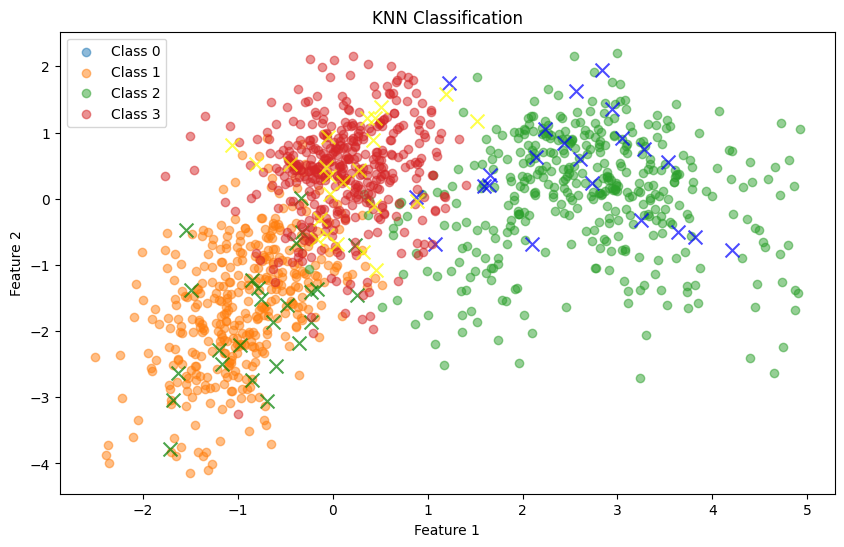

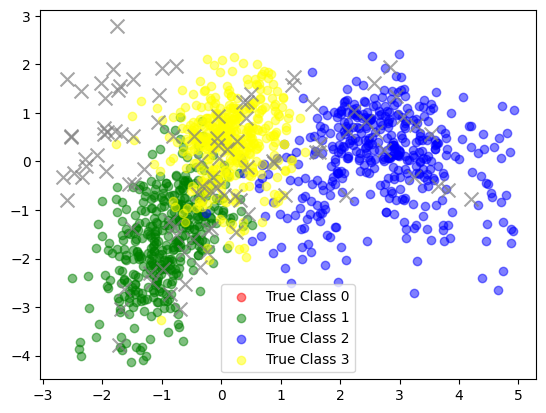

In [7]:
X_train_2d = PCA(n_components=2).fit_transform(X_train_scaled)
y_train_2d = y_train

X_test_scaled = scaler.fit_transform(x_test)
X_test_2d = PCA(n_components=2).fit_transform(X_test_scaled)

X_test_sample = X_test_2d[:100]
y_test_sample = y_test[:100]

plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'yellow']
for i, color in enumerate(colors):
    plt.scatter(X_train_2d[y_train_2d == i][:, 0], X_train_2d[y_train_2d == i][:, 1], label=f'Class {i}', alpha=0.5)
    plt.scatter(X_test_sample[y_test_sample == i][:, 0], X_test_sample[y_test_sample == i][:, 1], color=color, marker='x', s=100, alpha=0.7)

plt.title('KNN Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_2d, y_train_2d)
# predictions = knn.predict(X_test_sample)
# for i in range(4):
#     plt.scatter(X_train_2d[y_train_2d == i][:, 0], X_train_2d[y_train_2d == i][:, 1], color=colors[i], alpha=0.5, label=f'True Class {i}')
# plt.scatter(X_test_sample[:, 0], X_test_sample[:, 1], color='gray', marker='x', s=100, alpha=0.7)
# plt.legend()
# plt.show()


График представляет собой визуализацию результатов классификации KNN (K-ближайших соседей) в двуммерной проекции данных, полученной с помощью PCA (принципный компонентный анализ). Он предоставляет четкую визуальную репрезентацию результатов KNN-классификации на этом наборе данных, позволяя легко интерпретировать производительность модели.

А второй график особенно полезен для быстрой оценки производительности модели KNN и визуального сравнения истинных классов с предсказанными.

Вывод о проделанной работе:

Работа включала в себя несколько ключевых этапов. Сначала был сформирован DataFrame на основе исходных данных и проведена его предобработка. Затем были разработаны три модели для решения поставленной задачи: логистическая регрессия, дерево решений и k-ближайших соседей. Для каждой из моделей были построены Classification Report и Confusion Matrix, что позволило проанализировать полученные результаты.

Особое внимание было уделено визуализации KNN-модели, которая наглядно показывает принцип работы этой модели. Был подготовлен график, демонстрация работы модели (разграничение при помощи соседей).